# Program Analysis via Graph Reachability

## Introduction

程序分析是为了不运行就 “确认” 一些信息。在数据流分析当中，分析结果以 `point` 有关，每一个 `point` 都说明了在那个对应位置的可达定义 / 存活变量情况。

程序分析框架使用迭代的方法，寻找满足方程组的解。然后这篇说会以 “程序分析是图 / 上下文无关语言可达性问题” 为基础做一个分析框架。

文章还陈述了一下使用 “图可达性” 来做程序分析的好处：

* 图是个好用的数据结构，单源可达问题的时间复杂度与点边数量线性相关；CFL 的可达问题与节点三次方相关；
* CFL 可达问题可以像处理单源可达问题一样。可以获得更快的速度。

## CFL Reachability Problems

### 1. CFL Introduction

`CFL` 是满足上下文无关文法要求的语言。上下文无关文法和大多数文法一样，都拥有非终结符集 $V$，终结符集合 $T$，推导式集合 $P$ 和起始符 $S$。`CFG` 就是 **所有产生式左边只有非终结符，且只有一个非终结符**。

关于 `CFG` 识别问题可以看这个：[Generic CFG in Less than Cubic Time](https://www.sciencedirect.com/science/article/pii/S0022000075800468)。

CFL 可达问题不是一般的可达问题。

这里首先定义了一个 `L-path` 问题，这里的 $L$ 指的是一个 `CFL` 在字符集上的集合，也就是可能的字符串 / 可能的输入。`L-path` 就是在整个 $G$ 中可以表示 $L$ 的路径。

论文 2.1 里面给了一个图，那个从 $s \to t$ 的路径就是 $"[(e[])eee[e]]"$ 的 `L-path`。

此后，论文给出了 `all-pairs L-path` 问题的定义。然后这个实际上就和要做的东西有些相关了。相较于 “单源可达”（给定一个源，找到源可达的所有节点） / “单目标可达”（给定一个目标，找到所有可达该目标的源）问题，这 `all-pairs` 就是找到图中 **所有** 能够表示 $L$ 的路径。

论文中提出一般的图可达问题都可以通过 “给边标上 $e$，然后把 $L$ 定义为正则语言 $e*$” 转化成 `CFL` 的可达问题。比如 **图的转移闭包问题** 就可以表示成 `all-pairs e*`(因为转移前是图中的一系列点，要看 $n$ 步之后走到了哪里，这个终止状态又是一系列点)。再比如 `CFL` 识别问题，为了判断一个字符串是否属于给定的文法，该问题等同于：“给定一个初始状态，能否存在一个长度为 |str| 且终态满足要求的路径”。

### 2. Call-Return Matched

为了清除一些不会执行到的边，也就是死边，同时也是为了减少 **上下文不敏感分析** 带来的对变量可能取值范围的影响。（这个可以参考南大软件分析的 [CFL-Reachability](https://www.bilibili.com/video/BV1gL411j7vS)）本文也引入了过程间分析的一个方法：

> 只有那些 returns 和 calls 匹配的过程调用，才是 feasible 的。

如下图所示，主过程中的 `CALL P` 对应一个 $(_1$，其对应的 `EXIT P` 是 $)_1$。

#### 2.1 边的标号

这样 $n1,n2,start_p,n4,exit_p,n8$ 就对应 $ee(_1ee)_2$，这就不匹配，直接不这么走了。（这里需要注意的是，文章里面把每个 $call-start, exit-return$ 边标上了 $(_i\ or\ )_i$，而除此之外的边都标上了 $e$（当然好像得再排除 $call-return$ 边），所以上面 $e$ 的个数是和经过的普通边有关的）

#### 2.2 lambda 表达式

$$
\lambda x.y \quad x\ is\ input,\ and\ y\ is\ output\ of\ lambda.
$$

比如最大的那一坨，意思就是：

> 传入 S，如果 a 或者 g 未被定义，那么返回 S 并上 {a}，
>
> 反之返回 S 删除 {a} 之后的结果。

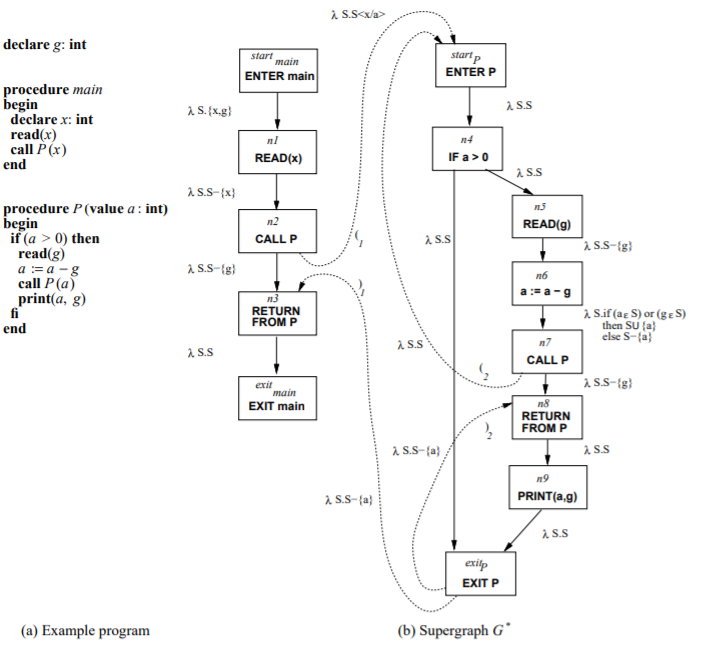

### 3. Datalog


## 4. 四个例子

这里文章举了四个可转化为 `CFL` 可达性来解决的问题：过程间数据流分析 / 过程间程序切片 / 形式分析 / 流不敏感指向分析。（呃，我觉得应该有几个都翻错了）

### 4.1 过程间数据流分析

这里涉及一个叫 `supergraph` 的概念，一般被表示为 $G^*$，是一个在 **原本过程内图的基础上** 还包含了 **call 指向 return**，**call 指向 start** 以及 **exit 指向 return** 的图。这里引用软件分析的图：

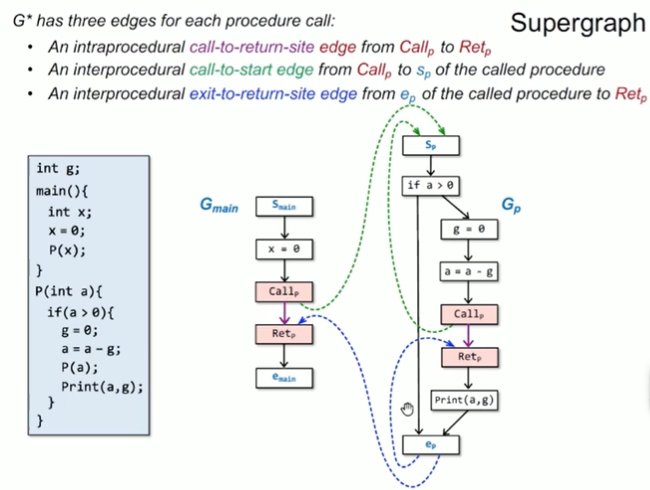

但我仔细想了一下，可能这个不是我暂时要看的东西？

#### 4.1.1 Realizable

一条路径只有当可被 $L$ 这种 `CFL` 识别，那么这个路径就是 `realizable`。而在文中，给出了如下文法：

$$
matched \to matched\ matched\ |\ (_i\ matched\ )_i\ |\ e\ |\ \epsilon \\
\\
realizable \to matched\ realizable\ |\ (_i\ realizable\ |\ \epsilon \\ 
$$

差不多意思就是，前面的括号一定要匹配，后面可能有尚未匹配的括号，但那些尚未匹配的括号是可能会在将来被匹配的。

#### 4.1.1 MOP(Meet-Over-All-Paths)

有一些假边。

#### 4.1.2 MRP(Meet-Over-All-Realizable-Paths)

`IFDS` 能够给出的结果。所有的边都是 `realizable`

### 4.2 过程间程序切片

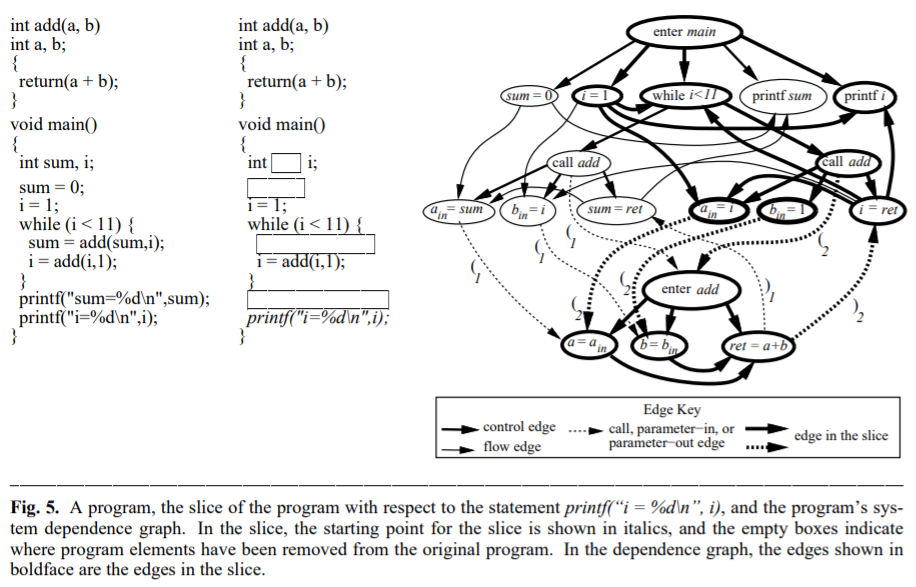

看起来像是把一个过程打成一个平面。之后用一些 `edge` 构筑平面上不同节点的关系。与先前的 “上下文不敏感的数据流分析” 不相同，这里的多次调用其他过程的 `call site` 是完全分开的——**使用不同的节点**。

```c
int add(int a, int b) {
    return (a + b);
}

// 省略一些语句
while (i < 11) {
    sum = add(sum, i); // 就只看这句话
}
```

1. 对于 `add` 这个过程，`sum, i` 是需要传入的参数，那么就有了图中的 `a_{in} = sum; b_{in} = i`。
2. 同时，`add` 这个过程还有 `a, b` 两个参数，所以要把传入的实际参数转化为形参 `a, b`，于是有了 `a = a_{in}; b = b_{in}`。

如果以 `printf i` 分析程序影响因素的话，大概会做如下操作：

1. 对于一个节点，所有入边都进行溯源；
2. 遇到 `return edge / call edge` 这类边时 **反匹配**，也就是先接受 ")"，而后匹配对应的 "("，不符合的不溯源。

### 4.3 形分析

主要是为了分析堆空间形状的。论文着重分析命令式语言。

但我觉得这个应该暂时不是我的重点。略过了。

### 4.4 流不敏感指向分析

流不敏感的意思是，忽略给定一段程序的逻辑结构，`if / while / for / while / goto` 这些一个不看，某条语句都有可能在其他任何一条语句执行后执行。这叫流不敏感，也就是说，逻辑控制流的存在，对程序分析算法来说无所谓。

指向分析指的是 “获取在程序运行中，可能指向某变量的指针超集”。在程序设计时，会使用很多指针或是使用由于指针才存在 / 成立的特性来实现代码复用。因此，指针与地址之间的关系可能非常复杂。这一节提到的 `Points-to Analysis` 不同于 `Pointer Analysis`，是一种可以建造指针变量与内存地址间关联的方法。具体描述可以看这里：[Points-to Analysis](https://engineering.purdue.edu/Cetus/Documentation/manual/ch07s05.html)

> The goal of the points-to analyzer is to identify the set of named or unnamed memory locations that a pointer variable may point to.

指向分析是指针分析的一个步骤。虽然指向分析关心的是，在程序执行的某一点处，现存的指针集合（大多为 `block` 中变量，即为栈上数据）到底都指向的哪里。但是，这并不意味着指向分析不考虑堆上内存情况。

在流不敏感的指针分析中，通常使用一些抽象方法（比如在分配内存时，用创建变量的方式表明指针的指向，这样就用新创建的变量的地址作为指针的值；而非模拟一个堆，跑到堆上去刨一块空间）。

然后在 4.3 和 4.4 中都使用了 `Datalog` 来表述 “关系”。

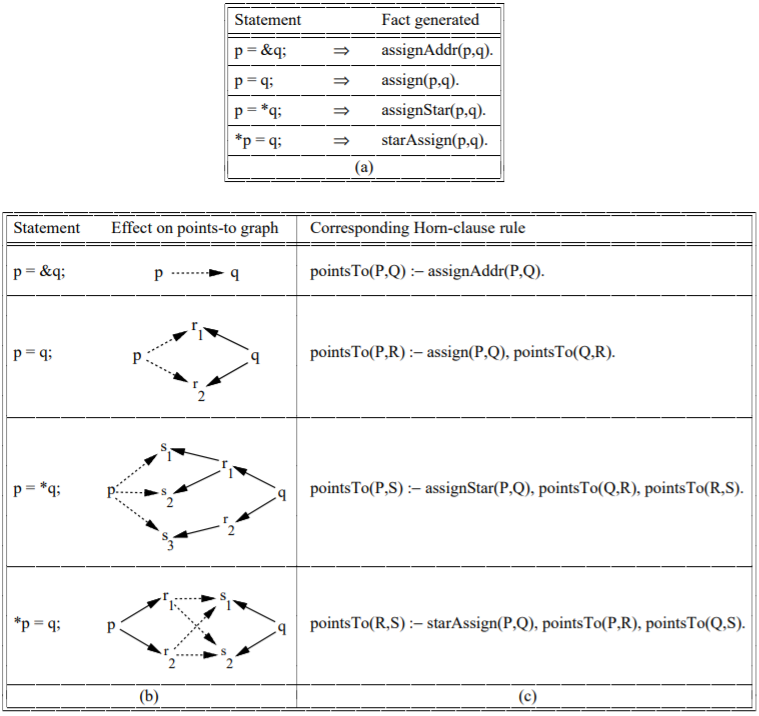

这个 8(a) 和 8(c) 的表示就是 `Datalog` 表示方式。

按照 `Datalog` 的方法，应该使用 8(a) 中的规则作为初始条件启动算法。8(c) 中的规则可以这样理解：

以 $p = q$ 为例，如果存在一个 $(P, Q, R)$ 三元组，满足了 $assign(P, Q), pointsTo(Q, R)$ 两个关系（也就是说，现在的 `edb / idb` 中存在这样的关系），那么就在 $pointsTo$ 关系中建立 $Q, R$ 之间的联系，说是 $pointsTo(Q, R)$。

$pointsTo$ 关系库是这个算法的输出，也是算法的核心。

论文里，后面的都是例子，就不说了。

## 5. 需求驱动分析

我一开始真没揣摩出啥是 `Demand Versions of Program-Analysis`，后面发现这个 `Versions` 是类型的意思，然后 `Demand` 的反义词在这里是 `Exhaustive`，后者意为 “穷尽、穷举、完全”，那么前者就是 “不完全、需要什么就分析什么、以需求为导向” 的。

就是要分析啥就分析啥。

## Note

| English | Chinese |
|-|-|
| amenable | 经得起检验的 |
| ascertain | 确定 |
| elaborate | 复杂的 |
| generalization | 一般情况 |
| vantage | 有利的 |
| asymptotic | 渐进的 |
| mimic | 模仿 |
| infeasible | 不可执行的 ｜
| variant | 变种 |
| auxiliary | 具有辅助作用的 |